<center>
    <h1><b>Loan Borrower Classification</b></h1>
</center>

**Table of Contents:**
    

  1.&nbsp;[Problem Statement and Background Information](#section1)<br>
         
  2.&nbsp;[Data Loading](#section2)<br>
       
  3.&nbsp;[Data Analysis and  pre-processing](#section3)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1&nbsp;[Data Visualization](#section31)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2&nbsp;[Handling Categorical variable through Dummification](#section32)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3&nbsp;[Train-Test Split](#section33)<br>
      
  4.&nbsp;[Data modeling](#section4)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1&nbsp;[Decision Tree](#section41)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.1&nbsp;[Building Decision Tree Model](#section411)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.2&nbsp;[Model Evaluation](#section412)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2&nbsp;[Random Forest](#section41)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.1&nbsp;[Building Random Forest Model](#section421)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.2&nbsp;[Model Evaluation](#section422)<br>
      

  

<a id="section1"></a>
<h3><b>1. Problem Statement and Background Information</b></h3>

Exploring publicly available data from __LendingClub.com__. Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.I am trying to create a model that will help predict people who have a profile of having a __high probability of paying back__.

Lending club had a very interesting year in __2016__. This data is from _before they even went public_.

I'm using lending data from __2007-2010__ and trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
- __credit.policy:__ 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- __purpose:__ The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- __int.rate:__ The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- __installment:__ The monthly installments owed by the borrower if the loan is funded.
- __log.annual.inc:__ The natural log of the self-reported annual income of the borrower.
- __dti:__ The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- __fico:__ The FICO credit score of the borrower.
- __days.with.cr.line:__ The number of days the borrower has had a credit line.
- __revol.bal:__ The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- __revol.util:__ The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- __inq.last.6mths:__ The borrower's number of inquiries by creditors in the last 6 months.
- __delinq.2yrs:__ The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- __pub.rec:__ The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

<a id="section2"></a>
<h3><b>2. Data Loading </b></h3>

In [2]:
import pandas as pd
loans = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<a id="section3"></a>
<h3><b>3. Data Analysis and Preprocessing</b></h3>

### Check the columns present in dataset

In [0]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [3]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

### Check the shape of dataset

In [0]:
loans.shape

(9578, 14)

### Check the descriptive statistics of dataset

In [0]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Check the info of the dataset

In [0]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Code to check if there is any missing values present in the dataset.

In [0]:

def missing_values():
    return loans.isnull().sum()
missing_values()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<b>No missing values in the dataset</b>

<a id="section31"></a>

<h3><b>3.1 Data Visualisation</b></h3>

### Plotting a histogram of two FICO distribution on top of each other, one for each credit.policy

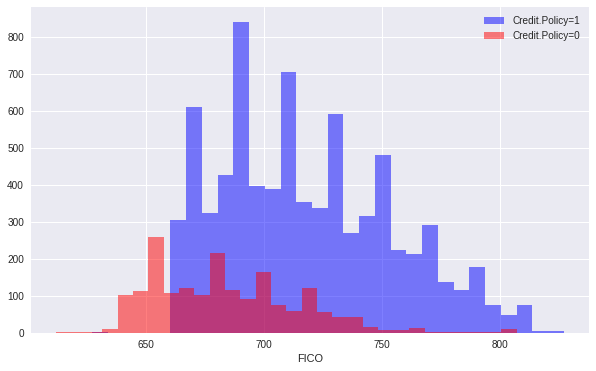

In [0]:
import matplotlib.pyplot as plt
def histogram():
    plt.figure(figsize=(10,6))
    loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5
                                ,color='blue',
                                              bins=30,label='Credit.Policy=1')
    loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
    plt.legend()
    plt.xlabel('FICO')
    
histogram()

<b>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise. 
FICO score is observed to be higher for Credit.Policy=1 (>650 to >800) and vise versa </b>

### Plotting a histogram of two FICO distribution on top of each other, one for each not.fully.paid

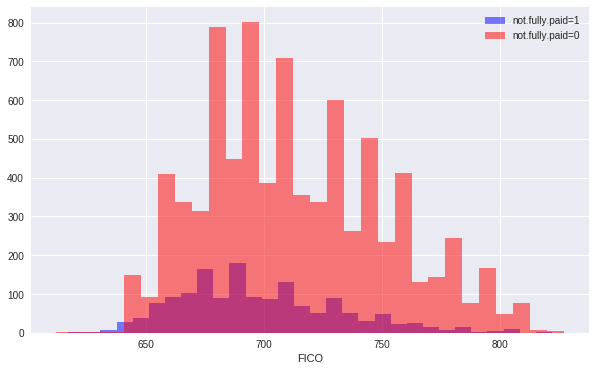

In [0]:
import matplotlib.pyplot as plt
def histogram2():
    plt.figure(figsize=(10,6))
    loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5
                                ,color='blue',
                                              bins=30,label='not.fully.paid=1')
    loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
    plt.legend()
    plt.xlabel('FICO')
    
                                              
histogram2()

<b>not.fully.paid=0 -> Paid Fully
not.fully.paid=1 -> Not Paid Fully
THE COUNT OF FULLY PAID WITH HIGHER FICO SCORE IS PRETTY HIGH THAN THE COUNT OF NOT PAID</b>

### Using seaborn countplot show the counts of loans by purpose, with the color hue defined by not.fully.paid

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


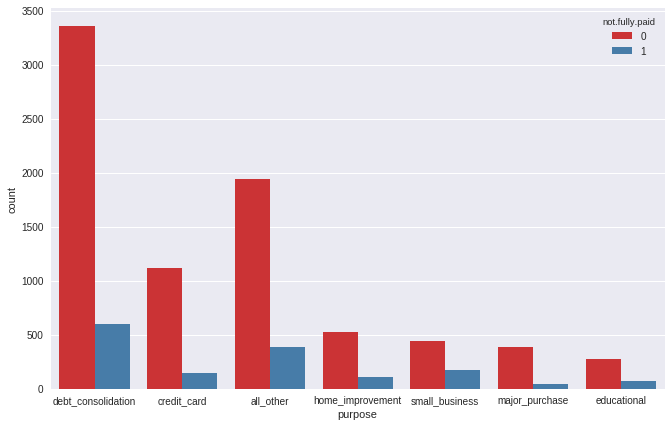

In [0]:
import seaborn as sns
def countPlot():
    plt.figure(figsize=(11,7))
    sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

countPlot()

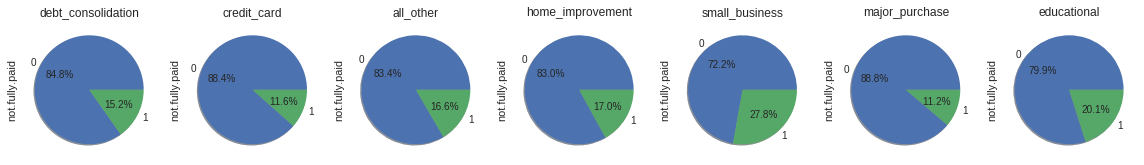

In [0]:
import matplotlib.pyplot as plt
def pieChart():
    f,ax = plt.subplots(1,7,figsize=(20,5))
    plt.rcParams['font.size'] = 10.0
    unique_purpose=loans["purpose"].unique()
    
    for i in range(0,len(unique_purpose)):
        loans["not.fully.paid"][loans["purpose"]==unique_purpose[i]].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[i],shadow=True)
        ax[i].set_title(unique_purpose[i])
        
    
pieChart()

<b>Its observed that SMALL BUSINESS'S have difficulty in repaying the loans than other purposes.</b>

### Using a seaborn countplot understand the trend between FICO score and interest rate

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


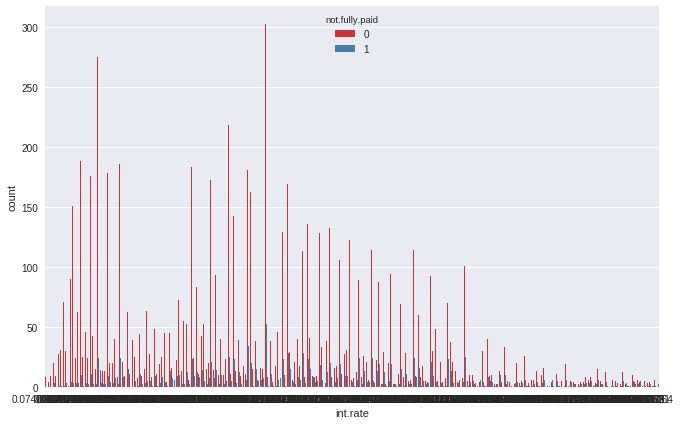

In [0]:
import seaborn as sns
def countPlot2():
    # set plot figure size
    # your code to create the countplot
    plt.figure(figsize=(11,7))
    sns.countplot(x='int.rate',hue='not.fully.paid',data=loans,palette='Set1')

countPlot2()

<a id="section32"></a>
<h2><b>3.2 Handling Categorical Variables through Dummification</b></h3>


``` ['purpose'] ```
- The purpose column is categorical. so transform them using dummy variables using pd.get_dummies.

In [0]:
cat_feats = ['purpose']

### Using pd.get_dummies create a fixed larger dataframe that has new feature columns with dummy variables.

In [0]:
final_data = pd.DataFrame()
def dummification():
    # create a new data frame final data with dummies of the categorical variables
    final_data=pd.get_dummies(data=loans,columns=cat_feats,drop_first=True)
    return final_data
final_data = dummification()

In [0]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


<a id="section33"></a>
<h3><b>3.3 Train-Test Split</b></h3>

### Extract the independent column to prepare X

In [0]:
X = pd.DataFrame()
def model_variables():
    # create new dataframe X having all the independebt variables
    X=final_data.drop('not.fully.paid',axis=1)
    return X#newly created dataframe
X = model_variables()
print(X)

      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
5                 1    0.0788       125.13       11.904968  16.98   727   
6                 1    0.1496       194.02       10.714418   4.00   667   
7                 1    0.1114       131.22       11.002100  11.08   722   
8                 1    0.1134        87.19       11.407565  17.25   682   
9                 1    0.1221        84.12       10.203592  10.00   707   
10                1    0.1347       360.43       10.434116  22.09   677   
11                1    0.1324       253.58       11.835009   9.16   662   
12                1    0.

### Extract dependent column into a dataframe y for model prediction

In [0]:
y = pd.DataFrame()
def target_variable():
     # create new dataframe y having the dependebt variable
    y=loans['not.fully.paid']
    return y#newly created dataframe
y = target_variable()

In [0]:
y

0       0
1       0
2       0
3       0
4       0
5       0
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9548    1
9549    1
9550    0
9551    1
9552    0
9553    0
9554    0
9555    1
9556    0
9557    0
9558    0
9559    0
9560    0
9561    0
9562    0
9563    1
9564    0
9565    1
9566    1
9567    0
9568    0
9569    1
9570    1
9571    1
9572    1
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

### Splitting X and y into train and test dataset

In [0]:
from sklearn.model_selection import train_test_split
def df_split():
    return train_test_split(X, y , test_size=0.3, random_state=1)#using train_test_split, split the data into train and test in the ration 70:30 respectively.
X_train, X_test, y_train, y_test = df_split()

### Check the shape of X and y of train dataset

In [0]:
def shape_check_train():
    print(X_train.shape)
    print(y_train.shape)
shape_check_train()

(6704, 18)
(6704,)


### Check the shape of X and y of test dataset

In [0]:
def shape_check_test():
    print(X_test.shape)
    print(y_test.shape)
shape_check_test()

(2874, 18)
(2874,)


<a id="section4"></a>
<h3><b>4. Data Modeling </b></h3>

<a id="section41"></a>
<h3><b>4.1 Decision Tree</b></h3>

<a id="section411"></a>
<h3><b>4.1.1 Building Decision Tree Model</b></h3>



In [0]:
from sklearn.tree import DecisionTreeClassifier
def decisionTreeCreation():
    # initate the DecisionTreeClasifier as dtree.
    dtree=DecisionTreeClassifier()
    return dtree
dtree = decisionTreeCreation()

### Fit the model on X_train and y_train

In [0]:
def data_fit():
    return dtree.fit(X_train,y_train)# the fitted model on X_train and y_train
data_fit()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Using the model for prediciton

In [0]:
predictions = pd.DataFrame()
def predict_test():
    # use the model for prediction and assign it to predictions
    predictions=dtree.predict(X_test)
    return predictions
predictions = predict_test()

In [0]:
import numpy as np
#np.count_nonzero(predictions) #number of people not repaid the loan ie not.fully.repaid
tup=np.where( predictions == 0)
len(tup[0])


2381

<a id="section421"></a>
<h3><b>4.2.1 Model Evaluation</b></h3>


### Model evaluation using Confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix
def confusionMatrix():
    con_mat=pd.DataFrame(confusion_matrix(y_test,predictions))
    con_mat.index=["Actual Loan repaid(not.fully.paid=0)","Actual loan not repaid(not.fully.paid=1)"] # GO WITH THE COLUMN NAME AND RENAME IT ACCORDING TO OUR CONVINENCE
    con_mat.columns=["Predicted loan repaid(not.fully.paid=0)","Predicted loan not repaid(not.fully.paid=1)"]
    return con_mat
    #COmpute and print the confusion matrix
    
con_mat=confusionMatrix()

In [0]:
con_mat

,Predicted loan repaid(not.fully.paid=0),Predicted loan not repaid(not.fully.paid=1)
Actual Loan repaid(not.fully.paid=0),2003,394
Actual loan not repaid(not.fully.paid=1),378,99


### Model evaluation using recall score

In [0]:
from sklearn.metrics import recall_score
def recall2():
    # compute the recall score as recall1
    # your code to print the recall1 scoreprint('Recall score for test data is:', recall1)
    recall1=recall_score(y_test,predictions)
    print("Recall score for test data is:",recall1)
    
    return recall1
recall1 = recall2()

Recall score for test data is: 0.20754716981132076


### Model evaluation using classification report.
- Refer the link for Classification report documentation - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [0]:
from sklearn.metrics import classification_report
def classficationReport():
    # COmpute and print the classification report
    print(classification_report(y_test,predictions)) 
classficationReport()

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2397
           1       0.20      0.21      0.20       477

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.73      0.73      0.73      2874



### Instantiate Decision Tree Classifer using sikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4).
- Refer the link for DecisionTreeClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [0]:
def dtreeclassifier():
    # instantiate Decision tree classifier as dtree1 with the above mentioned parameters
    dtree1=DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = dtreeclassifier()

### Fit the model X_train and y_train

In [0]:
def dtreeFit2():
    dtree1.fit(X_train,y_train)
    return dtree1# the fitted model on X_train and y_train
dtreeFit2()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Use the model for prediction

In [0]:
predictions_new = pd.DataFrame()
def dtree2_prediction():
    # use the model for prediction and assign it to predeictions_new
    predictions_new=dtree1.predict(X_test)
    return predictions_new
predictions_new = dtree2_prediction()

### Model evaluation using Confusion matrix

In [0]:
def confusion_matrix2():
    # Compute and print the confusion matrix
    con_mat2=pd.DataFrame(confusion_matrix(y_test,predictions_new))
    con_mat2.index=["ActualLoanRepaid(not.fully.paid=0)","ActualLoanNotRepaid(not.fully.paid=1)"] # GO WITH THE COLUMN NAME AND RENAME IT ACCORDING TO OUR CONVINENCE
    con_mat2.columns=["PredictedLoanRepaid(not.fully.paid=0)","PredictedLoanNotRepaid(not.fully.paid=1)"]
    return con_mat2

con_mat2=confusion_matrix2()

In [0]:
con_mat

,Predicted loan repaid(not.fully.paid=0),Predicted loan not repaid(not.fully.paid=1)
Actual Loan repaid(not.fully.paid=0),2003,394
Actual loan not repaid(not.fully.paid=1),378,99


In [0]:
con_mat2

,PredictedLoanRepaid(not.fully.paid=0),PredictedLoanNotRepaid(not.fully.paid=1)
ActualLoanRepaid(not.fully.paid=0),2384,13
ActualLoanNotRepaid(not.fully.paid=1),471,6


### Model evaluation using recall score

In [0]:
from sklearn.metrics import recall_score
def recall2_calculation():
    recall2=recall_score(y_test,predictions_new)
    return recall2
recall2 = recall2_calculation()

### Model evaluation using classification report

In [0]:
def classification_report2():
    print(classification_report(y_test,predictions_new))
classification_report2()

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2397
           1       0.32      0.01      0.02       477

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.75      0.83      0.76      2874



### Code to find the difference between the recall score of 2 Decision Tree models created above .

In [0]:
def recall_difference(): 
    return recall1-recall2
recall_difference()

0.1949685534591195

<a id="section42"></a>
<h3><b>4.2 Random Forest</b></h3>

<a id="section421"></a>
<h3><b>4.2.1 Building Random Forest Model</b></h3>


### Instantiating Random Forest Classifier using scikit learn having n_estimators = 600.

In [0]:
from sklearn.ensemble import RandomForestClassifier
def randomforest():
    rfc=RandomForestClassifier(n_estimators=600)
    return rfc
rfc = randomforest()

### Fit the model on X_train and y_train

In [0]:
def rf_fit():
    return rfc.fit(X_train,y_train) # the fitted model on X_train and y_train
rf_fit()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Using the model for prediction

In [0]:
predictions1 = pd.DataFrame()
def predictions3():
    predictions1=rfc.predict(X_test)
    return predictions1
predictions1 = predictions3()
predictions1

array([0, 0, 0, ..., 0, 0, 0])

<a id="section422"></a>
<h3><b>4.2.2 Model Evaluation</b></h3>


### Model evaluation using Confusion matrix 

In [0]:
def confusion_matrix3():
    con_mat3=pd.DataFrame(confusion_matrix(y_test,predictions1))
    con_mat3.index=["ActualLoanRepaid(not.fully.paid=0)","ActualLoanNotRepaid(not.fully.paid=1)"] # GO WITH THE COLUMN NAME AND RENAME IT ACCORDING TO OUR CONVINENCE
    con_mat3.columns=["PredictedLoanRepaid(not.fully.paid=0)","PredictedLoanNotRepaid(not.fully.paid=1)"]
    
    return con_mat3
con_mat3=confusion_matrix3()

In [0]:
con_mat3

,PredictedLoanRepaid(not.fully.paid=0),PredictedLoanNotRepaid(not.fully.paid=1)
ActualLoanRepaid(not.fully.paid=0),2388,9
ActualLoanNotRepaid(not.fully.paid=1),472,5


### Model evaluation using recall score

In [0]:
from sklearn.metrics import recall_score
def recall3():
    recall_rfc=recall_score(y_test,predictions1)
    return recall_rfc
recall_rfc = recall3()
recall_rfc

0.010482180293501049

### Model evaluation using Classification report.

In [0]:
def rf_classification_report():
    print(classification_report(y_test,predictions1))
    
rf_classification_report()

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.36      0.01      0.02       477

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.60      0.50      0.46      2874
weighted avg       0.76      0.83      0.76      2874



### Instantitating Random Forest Model using scikit learn having (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5).
- Refer the link for RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
def rf():
    rfc_new=RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0,max_depth=2,min_samples_split=4,min_samples_leaf=3,max_leaf_nodes=5)
    return rfc_new
rfc_new = rf()

### Fit the model on X_train and y_train

In [4]:
def rf2_fit():
    rfc_new.fit(X_train,y_train)
    return rfc_new
rf2_fit()

NameError: name 'rfc_new' is not defined

### Using the model for prediction

In [0]:
new_predictions = pd.DataFrame()
def prediction4():
    new_predictions=rfc_new.predict(X_test)
    return new_predictions
new_predictions = prediction4()
new_predictions

array([0, 0, 0, ..., 0, 0, 0])

### Model evaluation using Confusion Matrix

In [0]:
def confusion_matix4():
    con_mat4=pd.DataFrame(confusion_matrix(y_test,new_predictions))
    con_mat4.index=["ActualLoanRepaid(not.fully.paid=0)","ActualLoanNotRepaid(not.fully.paid=1)"] # GO WITH THE COLUMN NAME AND RENAME IT ACCORDING TO OUR CONVINENCE
    con_mat4.columns=["PredictedLoanRepaid(not.fully.paid=0)","PredictedLoanNotRepaid(not.fully.paid=1)"]
    
    return con_mat4
con_mat4=confusion_matix4()


### Model evaluation using recall score

In [0]:
from sklearn.metrics import recall_score
def recall4():
    recall_rfc1=recall_score(y_test,new_predictions)
    return recall_rfc1
recall_rfc1 = recall4()

### Model evaluation using Classification report

In [0]:
def classification_report4():
    print(classification_report(y_test,new_predictions))
classification_report4()

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2397
           1       0.00      0.00      0.00       477

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.42      0.50      0.45      2874
weighted avg       0.70      0.83      0.76      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
